## Convertir texto a Dataframe    

In [11]:
import pandas as pd

# Abrir el archivo de texto y leer las líneas
with open('../Dataset/Houses-dataset/Houses Dataset/HousesInfo.txt') as texto:
    contenido = texto.readlines()

# Crear una lista para almacenar los datos
datos_fila = [linea.split() for linea in contenido]

# Crear el DataFrame a partir de la lista
df = pd.DataFrame(datos_fila, columns=['bedrooms', 'bathrooms', 'area', 'zipcode', 'price'])

# Imprimir el DataFrame
df.head()


,bedrooms,bathrooms,area,zipcode,price
0,4,4,4053,85255,869500
1,4,3,3343,36372,865200
2,3,4,3923,85266,889000
3,5,5,4022,85262,910000
4,3,4,4116,85266,971226


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bedrooms   535 non-null    object
 1   bathrooms  535 non-null    object
 2   area       535 non-null    object
 3   zipcode    535 non-null    object
 4   price      535 non-null    object
dtypes: object(5)
memory usage: 21.0+ KB


In [13]:
df.isnull().sum()

bedrooms     0
bathrooms    0
area         0
zipcode      0
price        0
dtype: int64

## Agregar columnas de imagenes

In [2]:
import os

# Filtrar archivos con extensión .jpg
imagenes = [archivo for archivo in os.listdir('../Dataset/Houses-dataset/Houses Dataset/') if archivo.endswith('.jpg')]

# Filtrar archivos por tipo
bathrooms = [imagen for imagen in imagenes if imagen.endswith('bathroom.jpg')]
bedrooms = [imagen for imagen in imagenes if imagen.endswith('bedroom.jpg')]
kitchens = [imagen for imagen in imagenes if imagen.endswith('kitchen.jpg')]
frontals = [imagen for imagen in imagenes if imagen.endswith('frontal.jpg')]

# Ordenar las listas
bathrooms = sorted(bathrooms, key=lambda x: int(x.split('_')[0]))
bedrooms = sorted(bedrooms, key=lambda x: int(x.split('_')[0]))
kitchens = sorted(kitchens, key=lambda x: int(x.split('_')[0]))
frontals = sorted(frontals, key=lambda x: int(x.split('_')[0]))


In [3]:
# Crear columnas en el DataFrame
df['bathroom_image'] = bathrooms
df['bedroom_image'] = bedrooms
df['kitchen_image'] = kitchens
df['frontal_image'] = frontals

# Ordenar columnas
df = df[['bedrooms', 'bathrooms', 'area', 'zipcode', 'bathroom_image', 'bedroom_image', 'kitchen_image', 'frontal_image','price']]

# Mostrar DataFrame
df.head()

,bedrooms,bathrooms,area,zipcode,bathroom_image,bedroom_image,kitchen_image,frontal_image,price
0,4,4,4053,85255,1_bathroom.jpg,1_bedroom.jpg,1_kitchen.jpg,1_frontal.jpg,869500
1,4,3,3343,36372,2_bathroom.jpg,2_bedroom.jpg,2_kitchen.jpg,2_frontal.jpg,865200
2,3,4,3923,85266,3_bathroom.jpg,3_bedroom.jpg,3_kitchen.jpg,3_frontal.jpg,889000
3,5,5,4022,85262,4_bathroom.jpg,4_bedroom.jpg,4_kitchen.jpg,4_frontal.jpg,910000
4,3,4,4116,85266,5_bathroom.jpg,5_bedroom.jpg,5_kitchen.jpg,5_frontal.jpg,971226


## Mostrar imagen del dataset

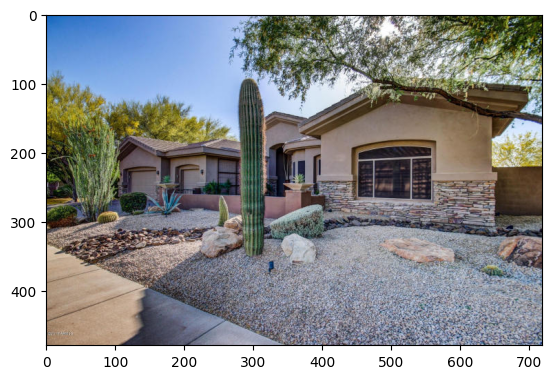

In [7]:
# Mostrar imagen frontal de la casa desde el dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Seleccionar la primera imagen frontal
imagen = df['frontal_image'][0]

# Mostrar la imagen con sus dimensiones
img = mpimg.imread('../Dataset/Houses-dataset/Houses Dataset/' + imagen)
imgplot = plt.imshow(img)
plt.show()

## Crear dataset de entrenamiento y prueba

In [8]:
from sklearn.model_selection import train_test_split

# --> Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(df[['bathrooms','bedrooms','area','zipcode', 'bathroom_image', 'kitchen_image', 'bedroom_image', 'frontal_image']], df['price'], test_size=0.2, random_state=42)

# --> Juntar X_train e y_train
train = pd.concat([X_train, y_train], axis=1)

# --> Juntar X_test e y_test
test = pd.concat([X_test, y_test], axis=1)

# Tamños de los datasets
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")


Train: (428, 9)
Test: (107, 9)


## Ver datos

In [9]:
train.head()

,bathrooms,bedrooms,area,zipcode,bathroom_image,kitchen_image,bedroom_image,frontal_image,price
284,5,5,3816,92880,285_bathroom.jpg,285_kitchen.jpg,285_bedroom.jpg,285_frontal.jpg,589900
347,2,2,1440,92276,348_bathroom.jpg,348_kitchen.jpg,348_bedroom.jpg,348_frontal.jpg,106000
440,3,4,1625,93510,441_bathroom.jpg,441_kitchen.jpg,441_bedroom.jpg,441_frontal.jpg,639000
421,3,4,2454,93510,422_bathroom.jpg,422_kitchen.jpg,422_bedroom.jpg,422_frontal.jpg,5858000
149,4.5,4,4038,92677,150_bathroom.jpg,150_kitchen.jpg,150_bedroom.jpg,150_frontal.jpg,1795000


## Exportar datos

In [10]:
df.to_csv('../Dataset/dataset.csv', index=False)

train.to_csv('../Dataset/train.csv', index=False)
test.to_csv('../Dataset/test.csv', index=False)